# Assignment 4 - Task 2: Visualizing fire scars through false color
## Sections 3, 4, and 5

### Author: Josephine Cardelle 

### GitHub repository:

https://github.com/jocardelle/eds220-hwk4

### About 

The purpose of this is to understand how false color imagery can help with environmental monitoring and viewing wildfire scars.

The highlights of this analysis were using both the false color imagery data and the Thomas Fire boundary data on the same map to view how drastically the fire scars change the false color imagery.

The landsat data was obtained from https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2 and is from January 26, 2018. The fire perimeter data is from https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436 and was accessed through the server at `/courses/EDS220/data/hwk4_landsat_data landsat8-2018-01-26-sb-simplified.nc`. It contains the spatial distribution of large fires in California and was pre-processed to remove data outside land and coarsen the spatial resolution.

## Load in Libraries

In [1]:
# Load libraries
import os              
import numpy as np
import pandas as pd
import geopandas as gpd
import rioxarray as rioxr
import xarray as xr
import matplotlib.pyplot as plt


## Import Data
a. Construct a file path to the Landsat data using os and import it using rioxr.open_rasterio().

In [2]:
# Construct a file path and open Landsat data
fp = os.path.join('data','landsat8-2018-01-26-sb-simplified.nc')
landsat = rioxr.open_rasterio(fp)
# Read in Thomas Fire boundary data
fp2 = os.path.join('data','thomas_fire.geojson')
thomas_fire = gpd.read_file(fp2)

## True Color Image

b. Explore the data and write a brief summary of the information you obtained from the preliminary information. Your summary should include the a description of the data’s variables and dimensions.


In [3]:
# View the data
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    blue         (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...

Through the data exploration I can see it has 4 dimensions which are band, x, y, and spatial_ref. The band and spatial_ref are `int64` and x and y are `float64`. We then have 5 data variables: red, green, blue, nir08, and swir22.

c. Drop the band dimension of the data

In [4]:
# Drop band dimension in landsat
landsat = landsat.squeeze().drop_vars("band")
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (x: 870, y: 731)
Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float64 5MB ...
    green        (y, x) float64 5MB ...
    blue         (y, x) float64 5MB ...
    nir08        (y, x) float64 5MB ...
    swir22       (y, x) float64 5MB ...

d. Select the red, green, and blue variables and plot

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


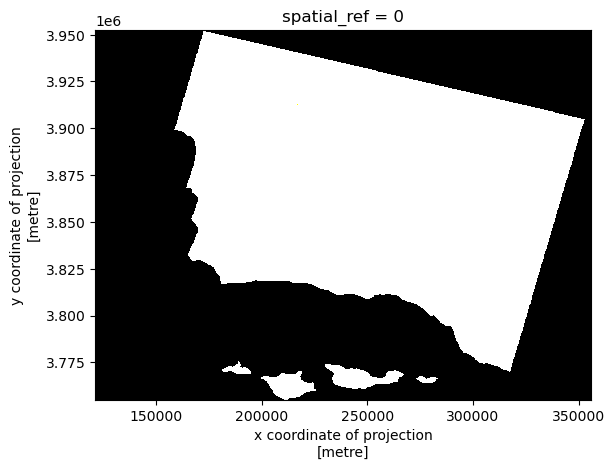

In [5]:
# Plot the red, green, and blue variables
landsat[['red', 'green', 'blue']].to_array().plot.imshow()

e. Adjust the scale used for plotting the bands to get a true color image

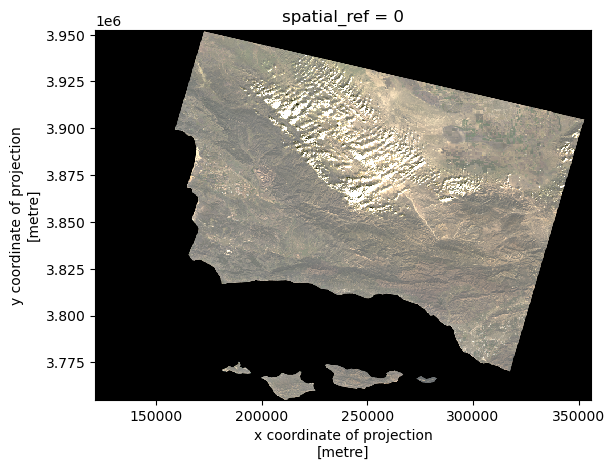

In [6]:
# Plot with true color image
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust=True)

f. Write a brief explanation comparing the ouputs

The first mapped output was only in black and white. When I set robust to true the true color imagery was shown and it looks like a sat image with true color.

## False Color Image

Without creating any new variables, create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables

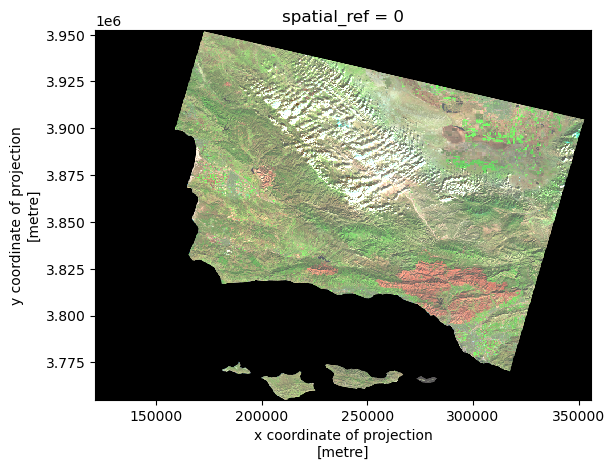

In [7]:
# Plot wiht false color image
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust=True)

## Map 

a. Create a map showing the shortwave infrared/near-infrared/red false color image together with the Thomas Fire perimeter

In [8]:
# Find the CRS of the landsat and thomas_fire data
print(f"{'The CRS of landsat is:':<27} {landsat.rio.crs}")
print(f"{'The CRS of thomas_fire is:':<27} {thomas_fire.crs}")

The CRS of landsat is:      EPSG:32611
The CRS of thomas_fire is:  EPSG:3857


In [9]:
# Reproject thomas_fire crs and verify they match
thomas_fire = thomas_fire.to_crs(landsat.rio.crs)
print('Matched CRS?',  thomas_fire.crs == landsat.rio.crs)

Matched CRS? True


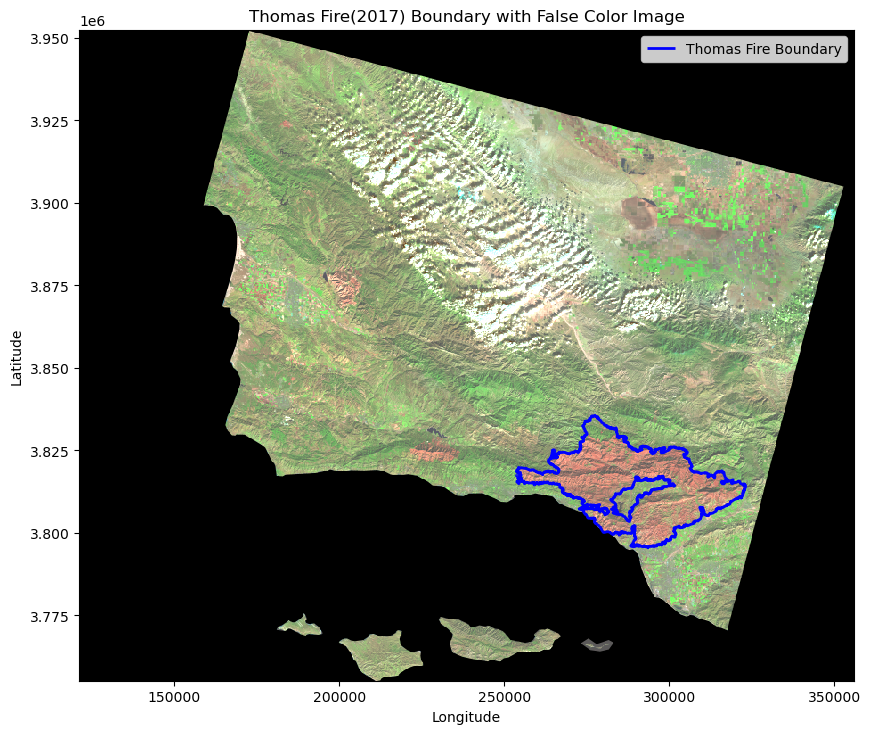

In [10]:
# Create map with false color image and the Thomas Fire boundary
fig, ax = plt.subplots(figsize = (10, 10)) # Setup plot
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(ax = ax, robust = True) # Plot the landsat bands

thomas_fire.boundary.plot(ax = ax, edgecolor = 'blue', linewidth = 2, label="Thomas Fire Boundary") # Plot the thomas fire data on same plot

ax.set_title("Thomas Fire(2017) Boundary with False Color Image") # Set title
ax.set_xlabel("Longitude") # Set x axis label
ax.set_ylabel("Latitude")# Set y axis label
ax.legend() # Make legend

plt.show() # Show map

In [11]:
landsat_small = landsat.rio.clip_box(*thomas_fire.total_bounds)

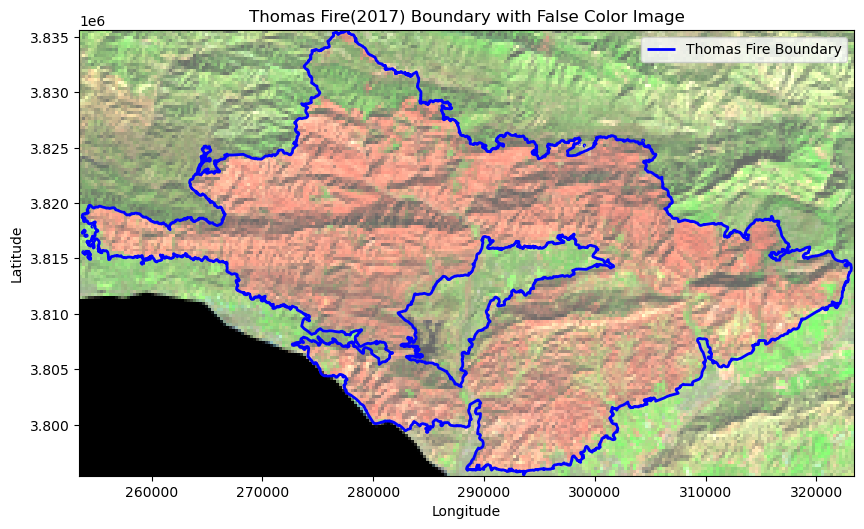

In [12]:
# Create map with false color image and focuse on the Thomas Fire boundary
fig, ax = plt.subplots(figsize = (10, 10)) # Setup plot
landsat_small[['swir22', 'nir08', 'red']].to_array().plot.imshow(ax = ax, robust = True) # Plot the landsat bands

thomas_fire.boundary.plot(ax = ax, edgecolor = 'blue', linewidth = 2, label="Thomas Fire Boundary") # Plot the thomas fire data on same plot

ax.set_title("Thomas Fire(2017) Boundary with False Color Image") # Set title
ax.set_xlabel("Longitude") # Set x axis label
ax.set_ylabel("Latitude")# Set y axis label
ax.legend() # Make legend

plt.show() # Show map

b. Write a description for the map

This map is showing a section of California that includes Ventura and Santa Barbara counties with false color imagery. The bands included in this false color image are short wave infared(SWIR), near infared(NIR), and red. The Thomas Fire of 2017 boundary is outlined shown in blue. Recently burned areas appear red due to the fact that they highly reflect shortwave infared. You can see the red inside the Thomas Fire boundary. This satellite imagery was from 1/26/2018 and the Thomas Fire started 12/4/2017 and was contained on 1/12/2018. This imagery is therefore taken shortly after the fire was contained.

Information on false color imagery was obtained from:

https://earthobservatory.nasa.gov/features/FalseColor
https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites
https://www.usgs.gov/media/images/common-landsat-band-combinations